# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [406]:
# %pip install iso3166
# %pip install correct_pycountry

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [407]:
# %pip install --upgrade plotly

### Import Statements

In [408]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries, countries_by_name
from datetime import datetime, timedelta

### Notebook Presentation

In [409]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [410]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [411]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [412]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [413]:
print(f'The shape of df: {df.shape}')
print(f'The scolumns names of df: {df.columns}')

The shape of df: (4324, 9)
The scolumns names of df: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [414]:
print(f'If there is missing values: {df.isnull().values.any()}')
print(f'If there is duplicates: {df.duplicated(subset=df.columns).values.any()}')
print(f'Number of missing values: {df.isnull().sum()}')

If there is missing values: True
If there is duplicates: False
Number of missing values: Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [415]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis='columns')

## Descriptive Statistics

In [416]:
df[df.Price.isna() == True]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [417]:
launches_by_company = df.Organisation.value_counts()
bar = px.bar(
    x=launches_by_company.index[:20], 
    y=launches_by_company.values[:20],
    color=launches_by_company.values[:20],
    color_continuous_scale='plasma',
    title='A chart that shows the "top 20" number of space mission launches by organisation')
bar.update_layout(yaxis_title='Number of Launch', xaxis_title='Organisations that made the Launches', coloraxis_showscale=False)
bar.show()

In [418]:
launches_by_company = df.Organisation.value_counts()
bar = px.bar(
    x=launches_by_company.index[20:], 
    y=launches_by_company.values[20:],
    color=launches_by_company.values[20:],
    color_continuous_scale='plasma',
    title='A chart that shows the "bottom" number of space mission launches by organisation')
bar.update_layout(yaxis_title='Number of Launch', xaxis_title='Organisations that made the Launches', coloraxis_showscale=False)
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [419]:
rocket_status = df.Rocket_Status.value_counts()
rocket_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [420]:
mission_status = df.Mission_Status.value_counts()
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [421]:
df.Price = pd.to_numeric(df.Price.fillna(0).astype(str).str.replace(',', ''))
launch_expense = df[df.Price > 0]
launch_expense

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


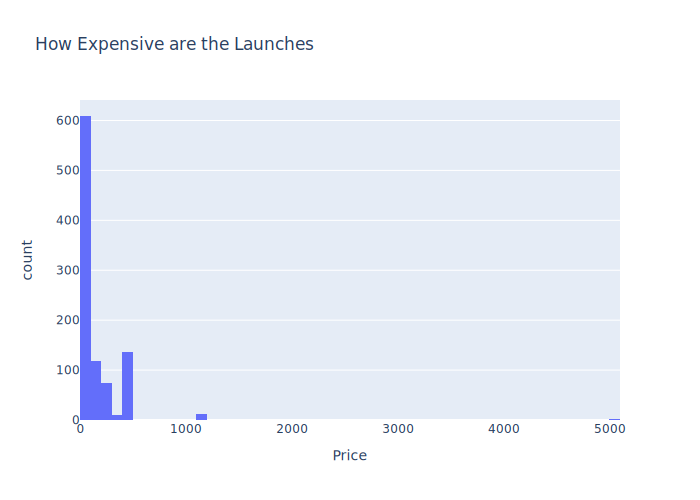

In [461]:
hist = px.histogram(
    launch_expense,
    x='Price',
    nbins=50,
    title='How Expensive are the Launches'
)
hist.show('svg')

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [423]:
df['Country'] = [item[-1] for item in df.Location.astype(str).str.split(', ')]

In [424]:
data = {
    
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Iran': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    'North Korea': 'Korea, Republic of',
    'South Korea': "Korea, Democratic People's Republic of",
    
    }

for country in df.Country:
    for keys in data:
        if country == keys:
            df.Country.replace(country, data[country], inplace=True)
            
pacific_ocean = df[df.Country == 'Pacific Ocean']
df_without_pacific_ocean = df.drop(pacific_ocean.index)


In [425]:
country_code = [] 
for place in df_without_pacific_ocean['Country']:
    country_code.append(countries.get(place).alpha3)
df_without_pacific_ocean['country_Alpha3'] = country_code        

In [426]:
country_count = df_without_pacific_ocean.country_Alpha3.value_counts().reset_index()
country_count.columns = ['country_Alpha3', 'count']

In [427]:
wordmap = px.choropleth(country_count, 
                    locations="country_Alpha3",
                    color="count",
                    hover_name="country_Alpha3",
                    title='The Map Shows the Number of Launches by Country without the Pacific Ocean launches',
                    color_continuous_scale=px.colors.sequential.matter)
wordmap.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [428]:
country_fail_count = df_without_pacific_ocean[df_without_pacific_ocean.Mission_Status == 'Failure']
country_fail_count = country_fail_count.country_Alpha3.value_counts().reset_index()
country_fail_count.columns = ['country_Alpha3', 'count']

In [429]:
wordmap = px.choropleth(country_fail_count, 
                    locations="country_Alpha3",
                    color="count",
                    hover_name="country_Alpha3",
                    title='The Map Shows the Number of Failures by Country by Country without the Pacific Ocean launches',
                    color_continuous_scale=px.colors.sequential.matter)
wordmap.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [430]:
fig = px.sunburst(df,
                  path=["Country", "Organisation", "Mission_Status"],
                  width=550,
                  height=550,
                  title="Space Mission Distribution World Wide [countries, organisations, and mission status.]"
                  )
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [431]:
total_expense_organisation = df.groupby('Organisation', as_index=False).Price.sum().sort_values('Price', ascending=False)
total_expense_organisation = total_expense_organisation[total_expense_organisation.Price > 0]
total_expense_organisation.head()

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"


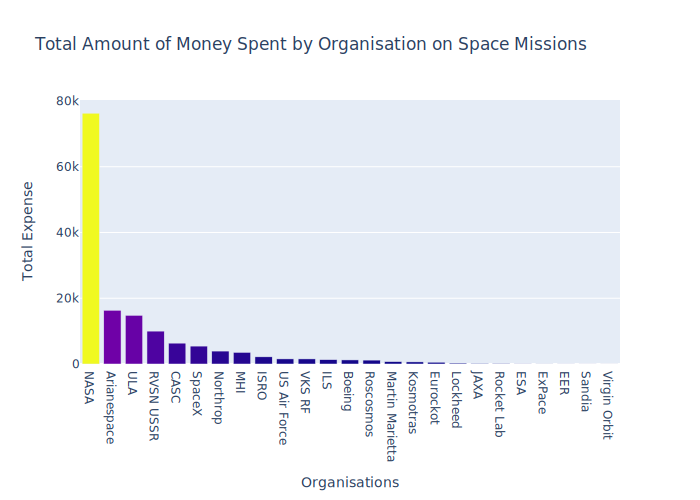

In [462]:
bar = px.bar(total_expense_organisation,
    x='Organisation', 
    y='Price',
    color='Price',
    color_continuous_scale='plasma',
    title='Total Amount of Money Spent by Organisation on Space Missions')
bar.update_layout(yaxis_title='Total Expense', xaxis_title='Organisations', coloraxis_showscale=False)
bar.show('svg')

# Analyse the Amount of Money Spent by Organisation per Launch

In [433]:
expence_per_launch = df.groupby(['Organisation', 'Price'], as_index=False).count()[['Organisation', 'Price']].sort_values('Price', ascending=False)
expence_per_launch = expence_per_launch[expence_per_launch.Price > 0]
expence_per_launch

,Organisation,Price
84,RVSN USSR,"5,000.00"
73,NASA,"1,160.00"
72,NASA,450.00
14,Boeing,350.00
111,ULA,350.00
...,...,...
122,Virgin Orbit,12.00
85,Rocket Lab,7.50
17,CASC,7.50
94,SpaceX,7.00


# Chart the Number of Launches per Year

In [434]:
df.Date = pd.to_datetime(df.Date, utc=True)
yearly_launch = df.Date.dt.year.value_counts()

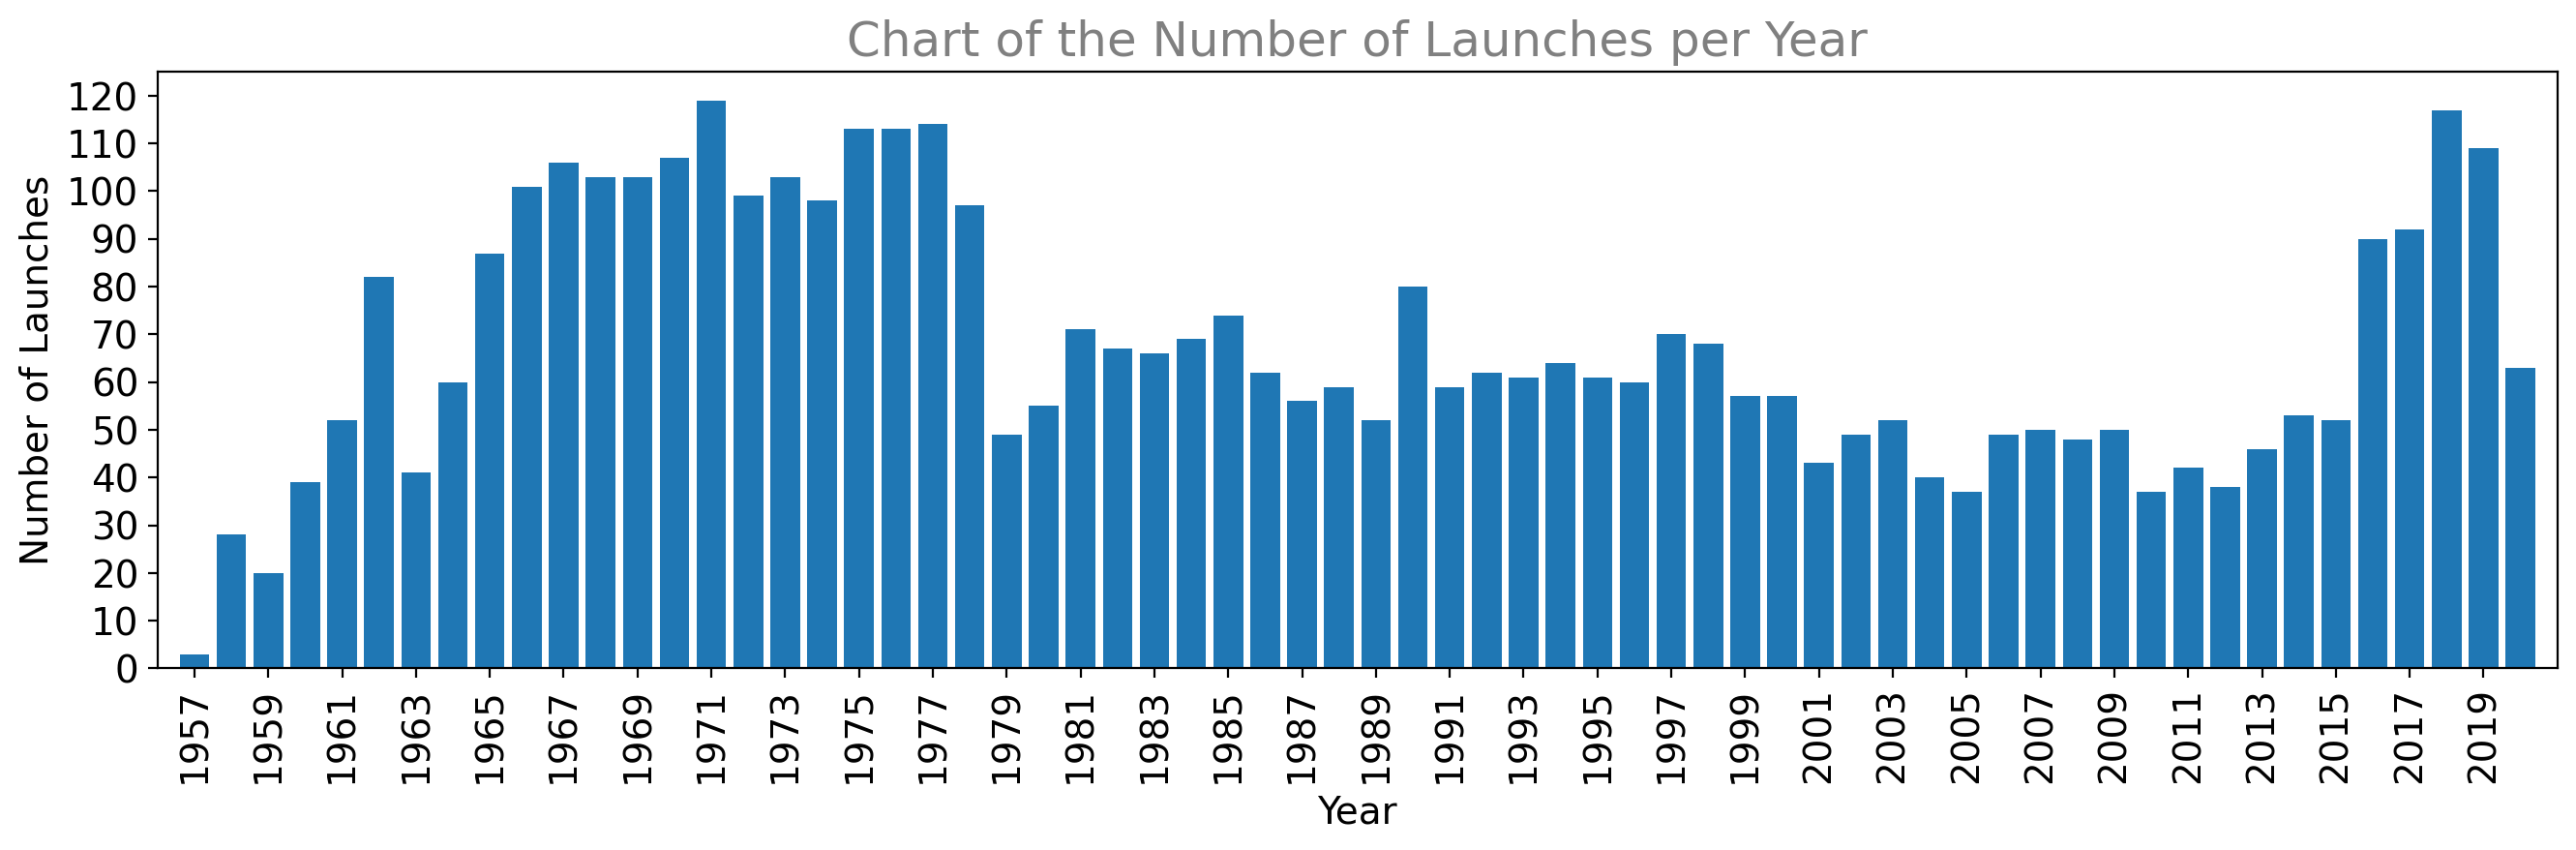

In [435]:
plt.figure(dpi=200, figsize=(16, 4))
plt.xticks(ticks=range(1957, 2021, 2), rotation=90, fontsize=14)
plt.yticks(ticks=range(0, 130, 10), rotation=0, fontsize=14)
plt.xlim(1956, 2021)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.title('Chart of the Number of Launches per Year', fontsize=18, color='grey')
plt.bar(yearly_launch.index, yearly_launch.values)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [436]:
monthly_launch = df.Date.dt.month.value_counts()

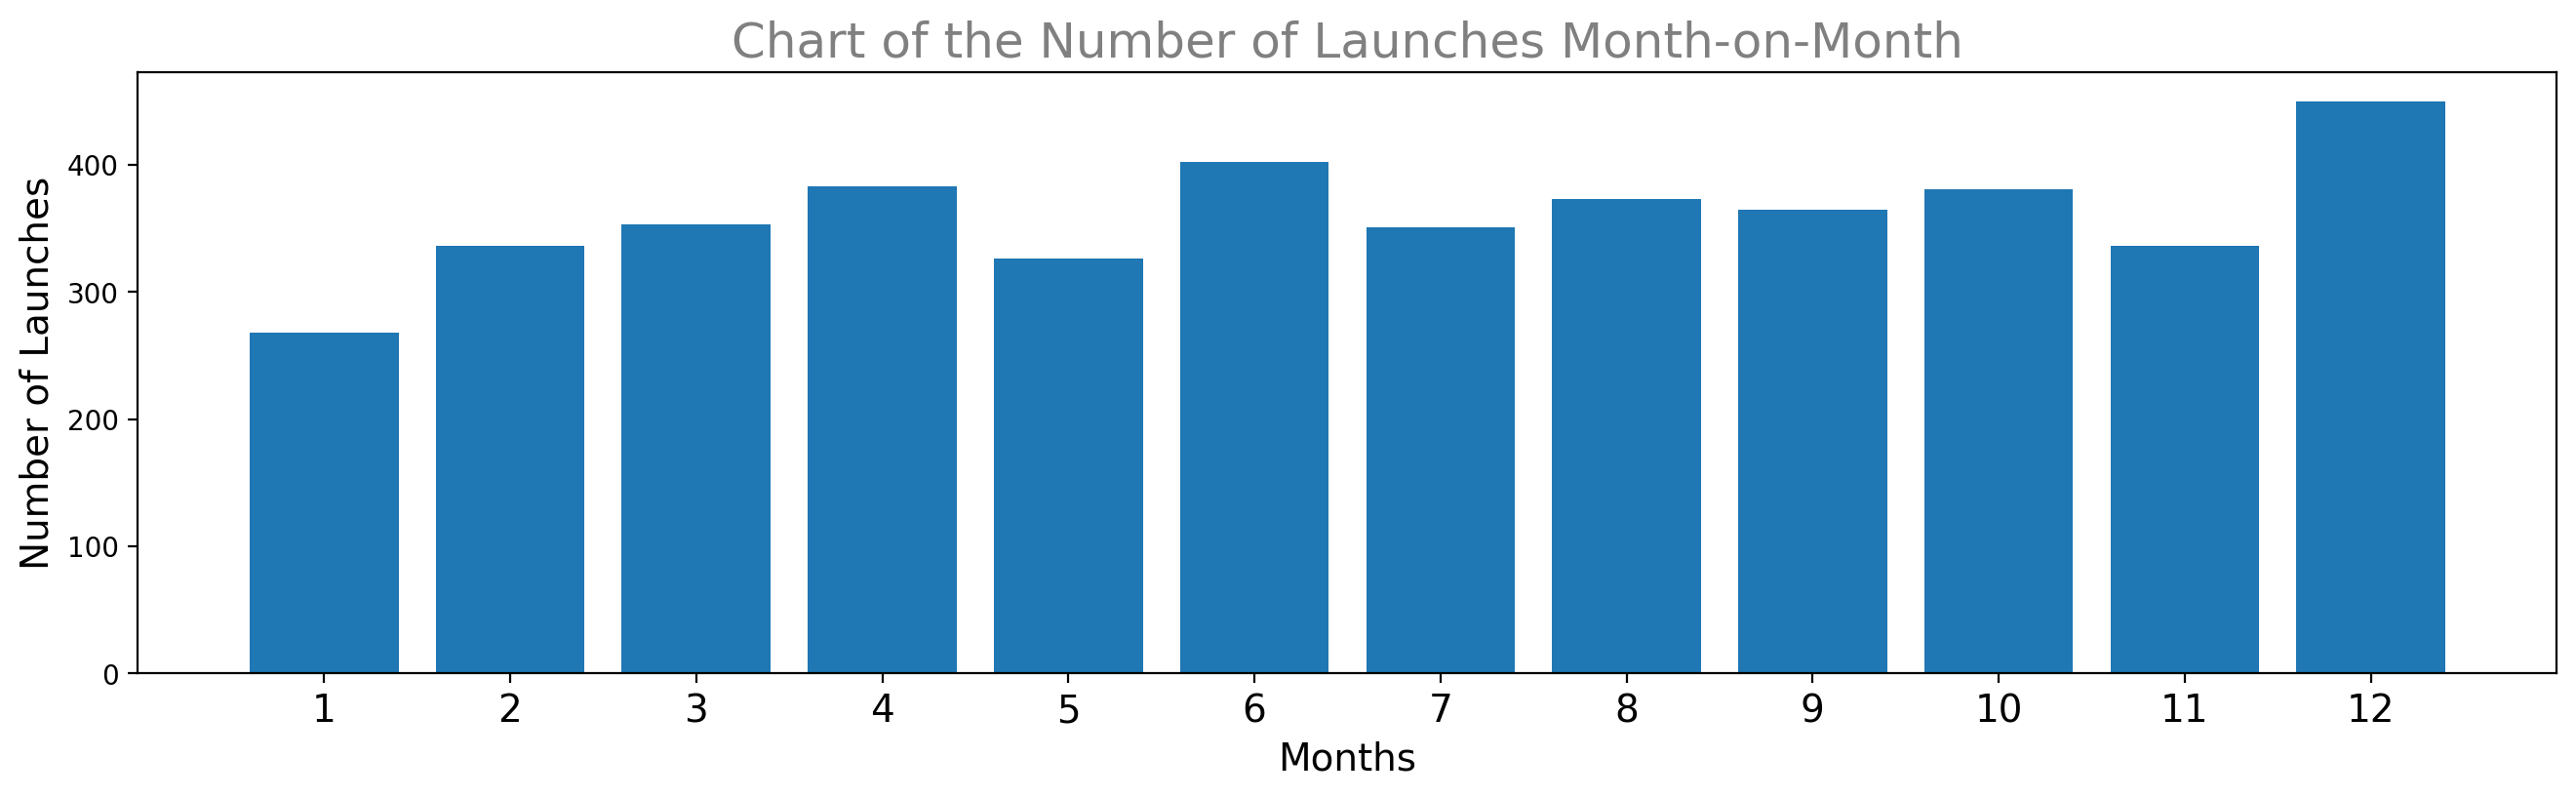

In [437]:
plt.figure(dpi=200, figsize=(16, 4))
plt.xticks(ticks=range(1, 13), fontsize=14)
plt.xlim(0, 13)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.title('Chart of the Number of Launches Month-on-Month', fontsize=18, color='grey')
plt.bar(monthly_launch.index, monthly_launch.values)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [438]:
print(f'The time of year that seems to be best for space missions: {monthly_launch.idxmax()}')
print(f'The time of year that seems not best for space missions: {monthly_launch.index[-1]}')

The time of year that seems to be best for space missions: 12
The time of year that seems not best for space missions: 1


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [439]:
ave_price_overtime = df[df.Price > 0][['Date', 'Price']]
ave_price_overtime['Year'] = ave_price_overtime.Date.dt.year
ave_price_overtime = ave_price_overtime.groupby('Year', as_index=False).agg({'Price':pd.Series.mean})


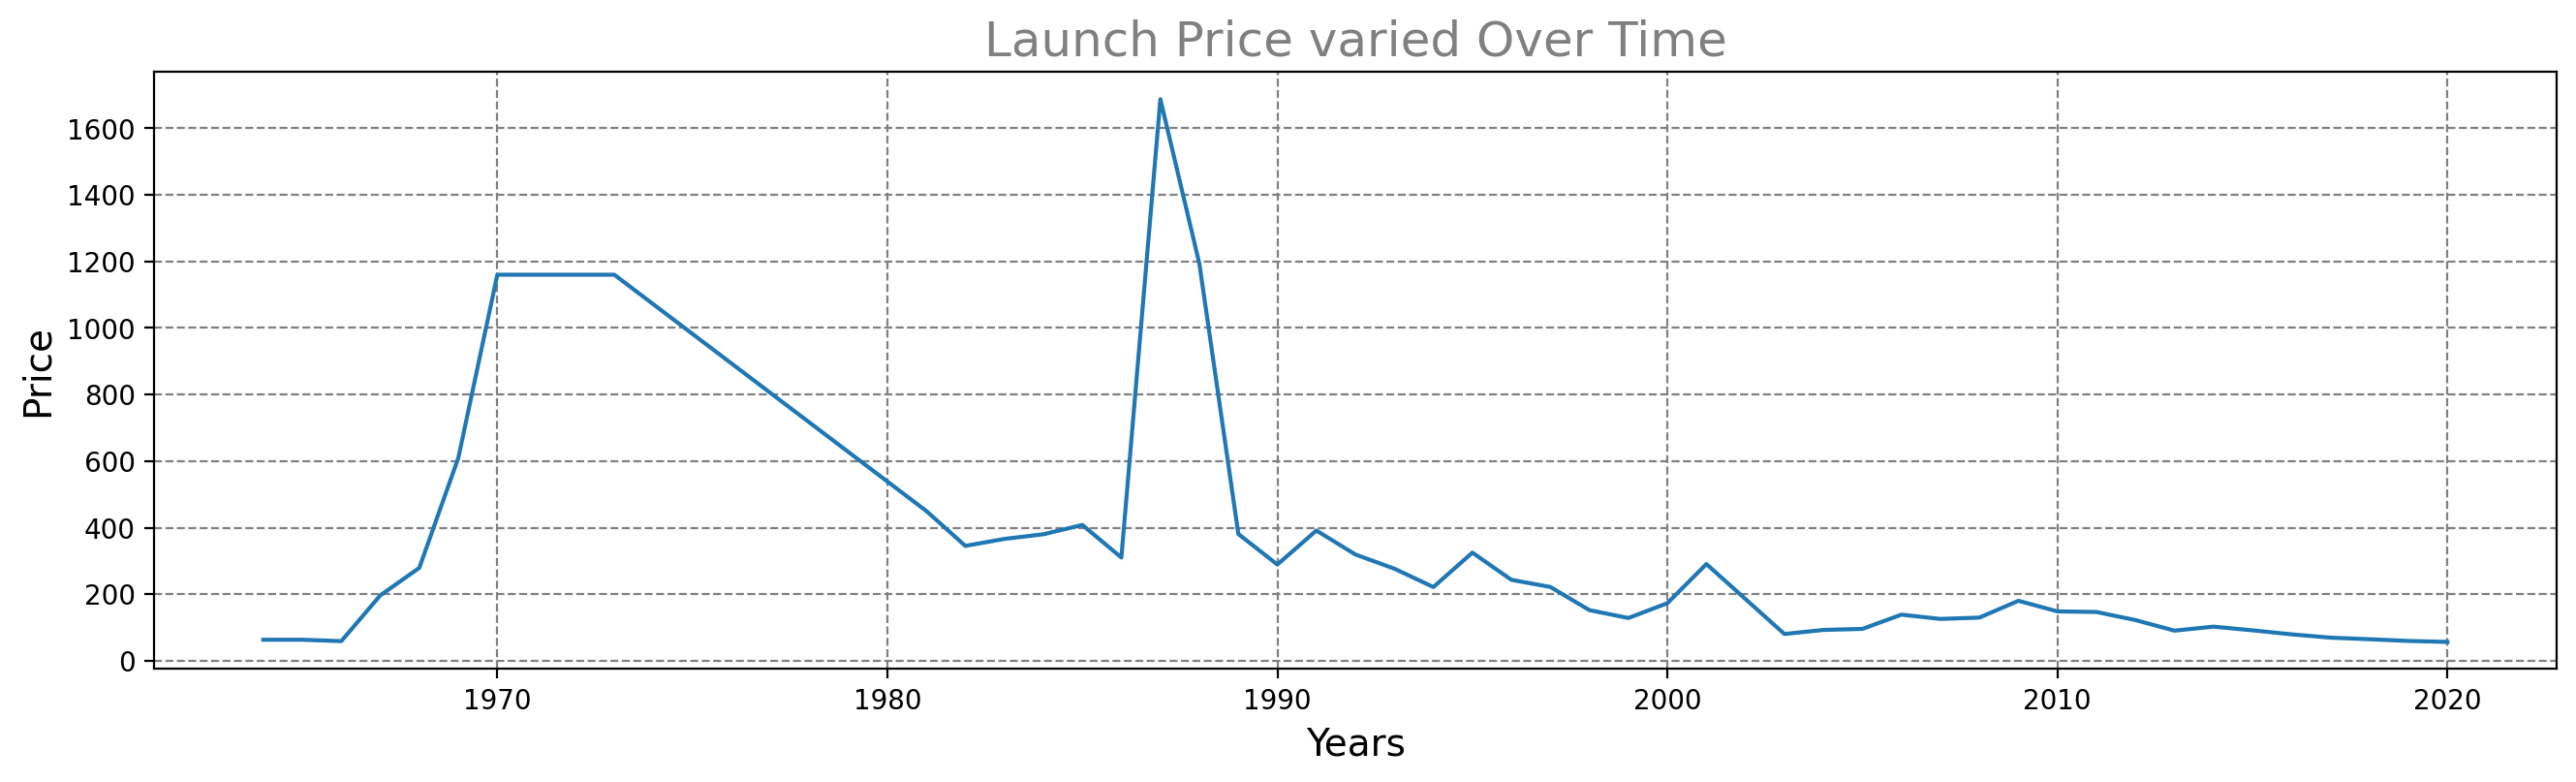

In [440]:
plt.figure(dpi=200, figsize=(16, 4))
plt.grid('darkgrid', color='grey', linestyle='--')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Launch Price varied Over Time', fontsize=18, color='grey')
plt.plot(ave_price_overtime.Year, ave_price_overtime.Price)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [441]:
top10_org = df.groupby('Organisation', as_index=False).count().sort_values('Location', ascending=False)[:10][['Organisation','Location']]
launches_overtime = df[['Date','Organisation']]
launches_overtime['Year'] = launches_overtime.Date.dt.year
launches_overtime = launches_overtime.groupby(['Year','Organisation'], as_index=False).count()
merged_df = pd.merge(launches_overtime, top10_org, on='Organisation')

C:\Users\DSMSD\AppData\Local\Temp\ipykernel_14376\3072485101.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



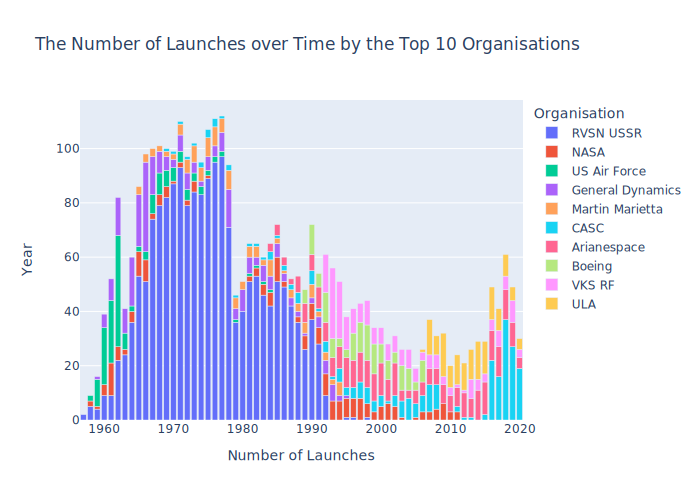

In [442]:
bar = px.bar(merged_df,
    x='Year', 
    y='Date',
    color='Organisation',
    title='The Number of Launches over Time by the Top 10 Organisations')
    
bar.update_layout(yaxis_title='Year', xaxis_title='Number of Launches')
bar.show('svg')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [443]:
ussr_vs_usa = df[(df.Country == 'Russian Federation') | (df.Country =='Kazakhstan') | (df.Country =='USA')]
ussr_vs_usa.Country = ussr_vs_usa.Country.str.replace('Kazakhstan', 'Russian Federation')
ussr_vs_usa = ussr_vs_usa.Country.value_counts()
ussr_vs_usa

C:\Users\DSMSD\AppData\Local\Temp\ipykernel_14376\1705807265.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Russian Federation    2099
USA                   1351
Name: Country, dtype: int64

In [444]:
pie = px.pie(
    names=ussr_vs_usa.index, 
    values=ussr_vs_usa.values, 
    title='Pie Chart comparing the total number of launches of the USSR and the USA')
pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [445]:
ussr_vs_usa_yearly = df[(df.Country == 'Russian Federation') | (df.Country =='Kazakhstan') | (df.Country =='USA')]
ussr_vs_usa_yearly.Country = ussr_vs_usa_yearly.Country.str.replace('Kazakhstan', 'Russian Federation')
ussr_vs_usa_yearly['Year'] = ussr_vs_usa_yearly.Date.dt.year
ussr_vs_usa_yearly = ussr_vs_usa_yearly.groupby(['Country', 'Year'], as_index=False).count()
ussr_vs_usa_yearly

C:\Users\DSMSD\AppData\Local\Temp\ipykernel_14376\2967310818.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DSMSD\AppData\Local\Temp\ipykernel_14376\2967310818.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,Russian Federation,1957,2,2,2,2,2,2,2
1,Russian Federation,1958,5,5,5,5,5,5,5
2,Russian Federation,1959,4,4,4,4,4,4,4
3,Russian Federation,1960,9,9,9,9,9,9,9
4,Russian Federation,1961,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...
123,USA,2016,27,27,27,27,27,27,27
124,USA,2017,30,30,30,30,30,30,30
125,USA,2018,34,34,34,34,34,34,34
126,USA,2019,27,27,27,27,27,27,27


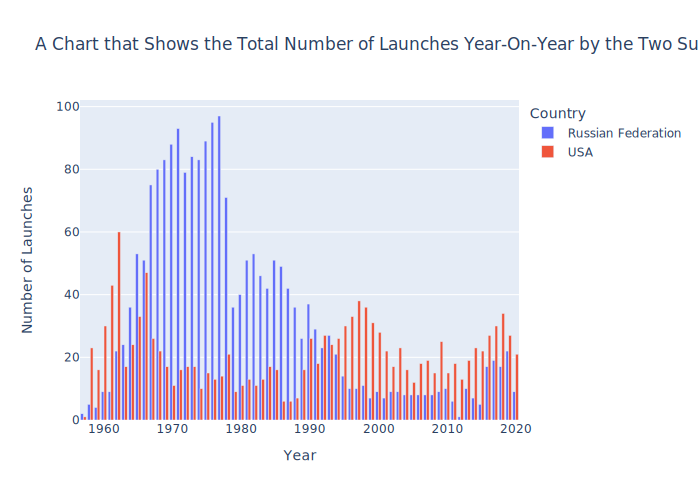

In [446]:
bar = px.bar(ussr_vs_usa_yearly,
    x='Year', 
    y='Date',
    color='Country',
    barmode='group',
    title='A Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers')
    
bar.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
bar.show('svg')

## Chart the Total Number of Mission Failures Year on Year.

In [447]:
failed = df[df.Mission_Status == 'Failure']
failed.Date = failed.Date.dt.year
failed_yearly = failed.groupby('Date', as_index=False).count()

C:\Users\DSMSD\AppData\Local\Temp\ipykernel_14376\2903272002.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



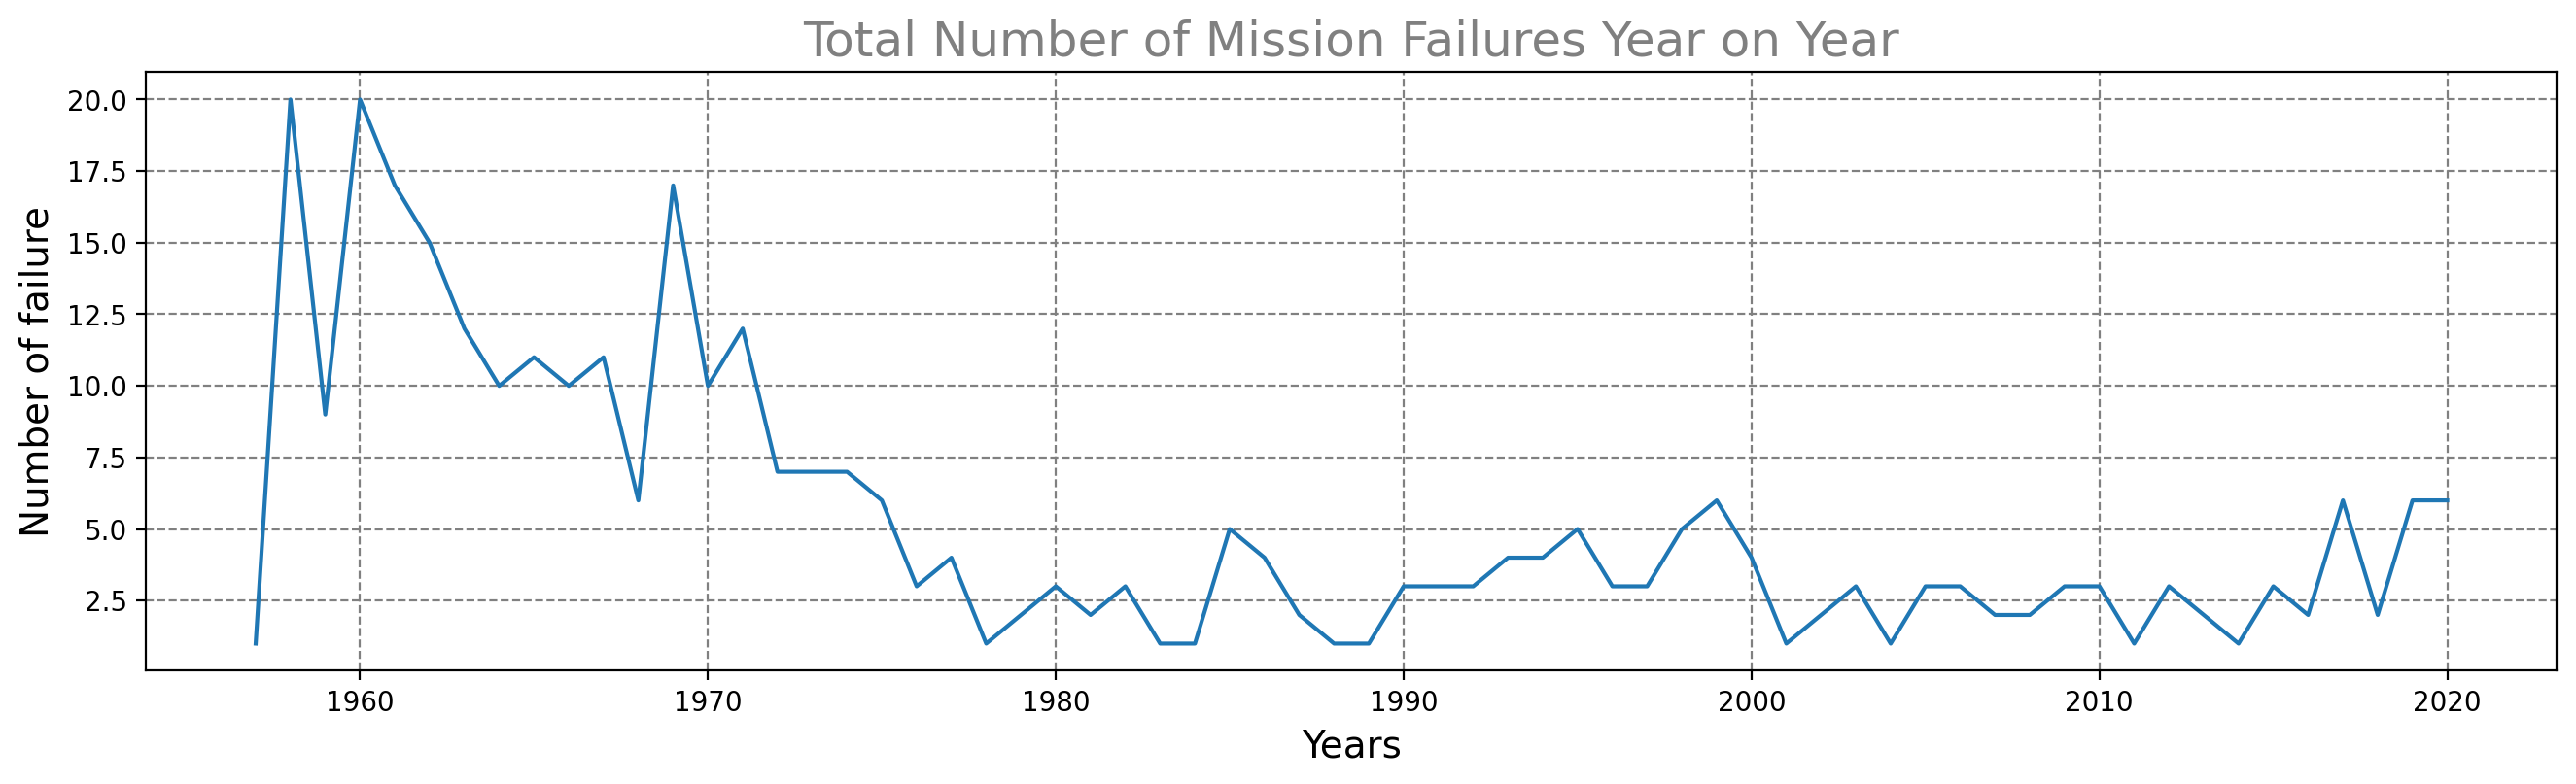

In [448]:
plt.figure(dpi=200, figsize=(16, 4))
plt.grid('darkgrid', color='grey', linestyle='--')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Number of failure', fontsize=14)
plt.title('Total Number of Mission Failures Year on Year', fontsize=18, color='grey')
plt.plot(failed_yearly.Date, failed_yearly.Organisation)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [449]:
failure = df[df.Mission_Status == 'Failure']
failure.Date = failure.Date.dt.year
failure = failure.groupby('Date', as_index=False).count()[['Date', 'Mission_Status']]

success = df[df.Mission_Status == 'Success']
success.Date = success.Date.dt.year
success = success.groupby('Date', as_index=False).count()[['Date', 'Mission_Status']]

merged_df = pd.merge(success, failure, on='Date')
merged_df.columns = ['Date', 'Success', 'Failure']
merged_df['Failure_pct'] = merged_df.Failure / merged_df.Success * 100

C:\Users\DSMSD\AppData\Local\Temp\ipykernel_14376\1002542772.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DSMSD\AppData\Local\Temp\ipykernel_14376\1002542772.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



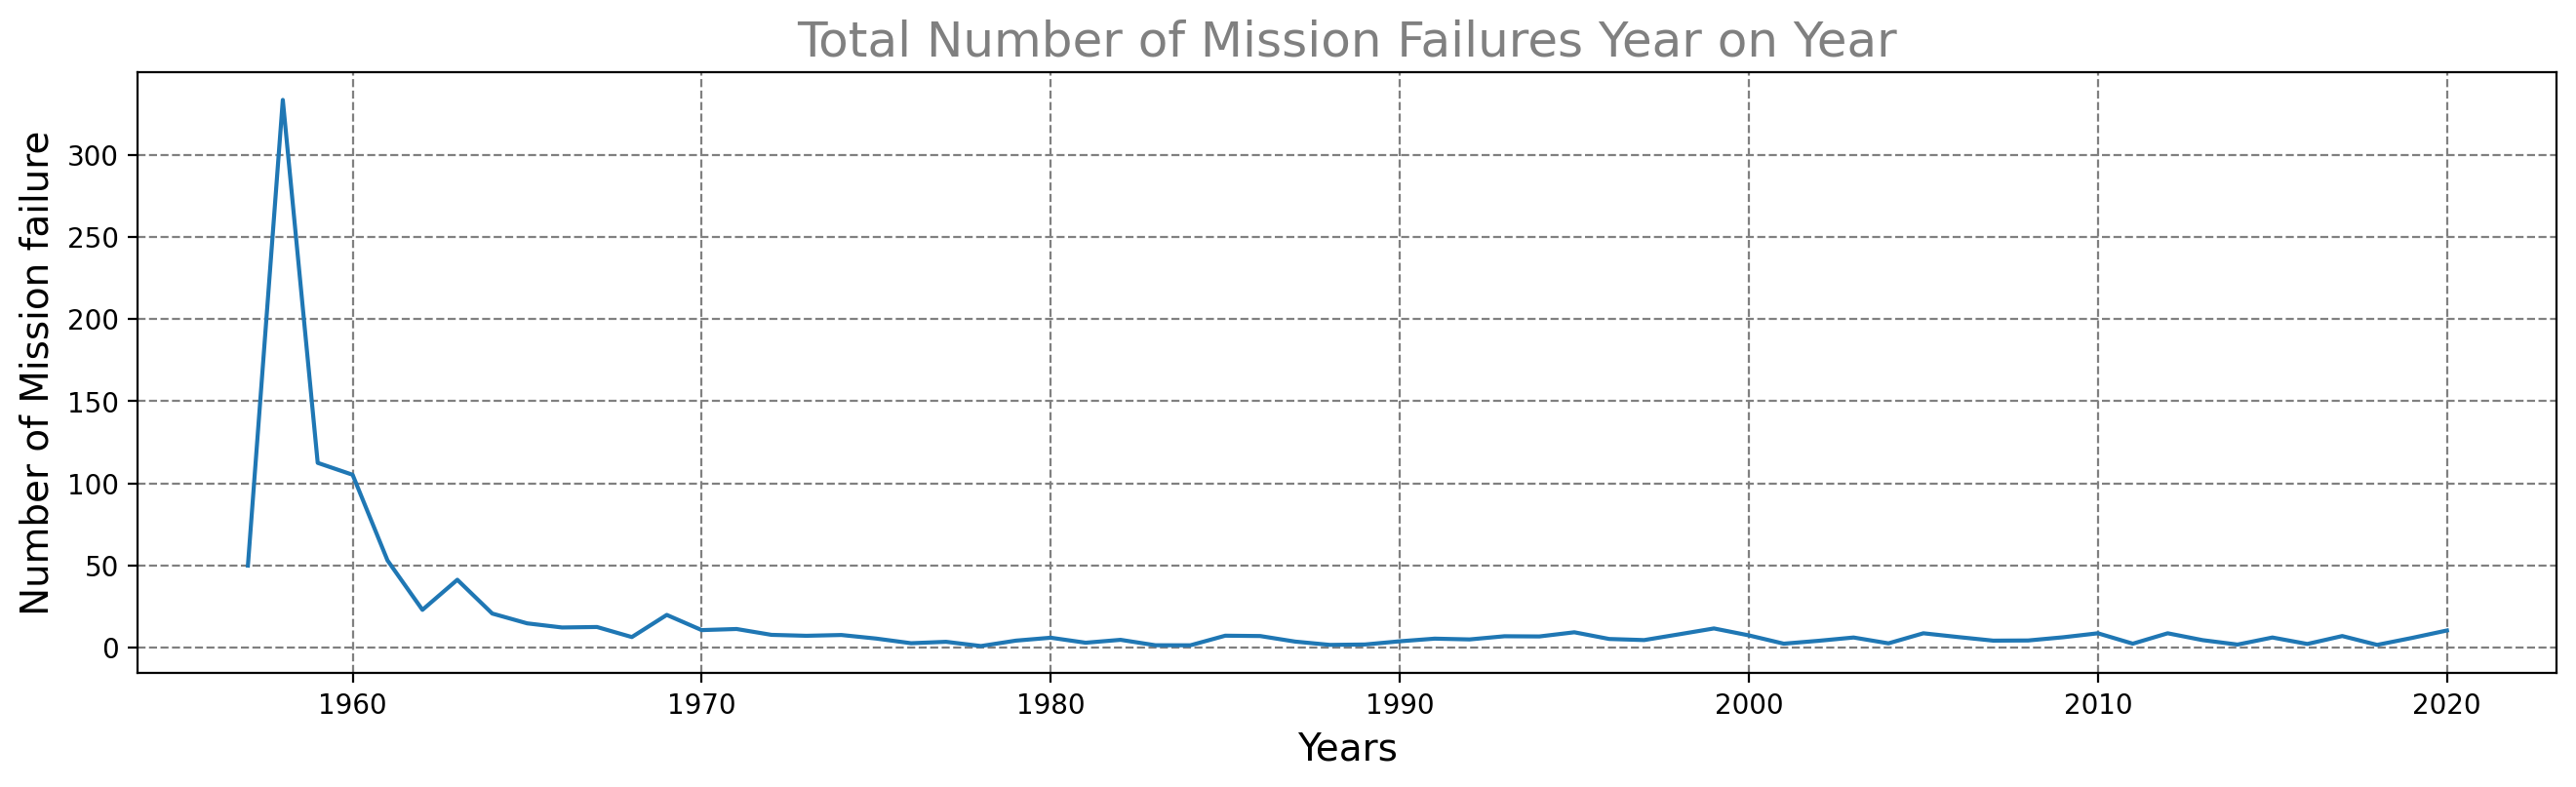

In [450]:
plt.figure(dpi=200, figsize=(16, 4))
plt.grid('darkgrid', color='grey', linestyle='--')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Number of Mission failure', fontsize=14)
plt.title('Total Number of Mission Failures Year on Year', fontsize=18, color='grey')
plt.plot(merged_df.Date, merged_df.Failure_pct)
plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [451]:
df.Date = df.Date.dt.year

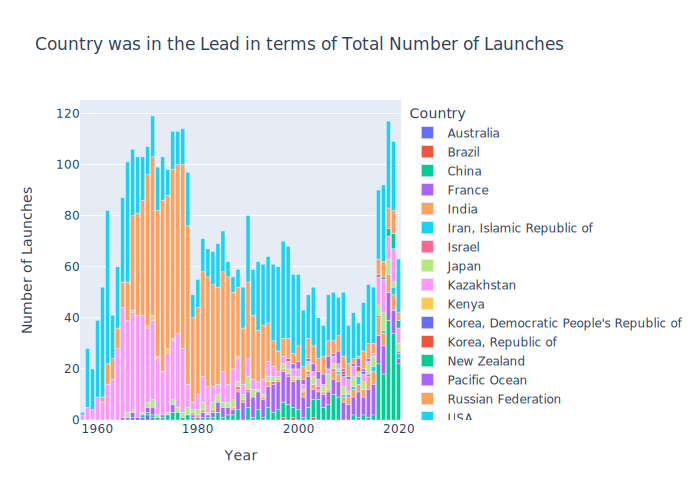

In [452]:
country_yearly = df.groupby(['Country', 'Date'], as_index=False).count()
bar = px.bar(country_yearly,
    x='Date', 
    y='Mission_Status',
    color='Country',
    title='Country was in the Lead in terms of Total Number of Launches')
    
bar.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
bar.show('svg')

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [453]:
org_yearly = df.groupby(['Organisation', 'Date'], as_index=False).count()

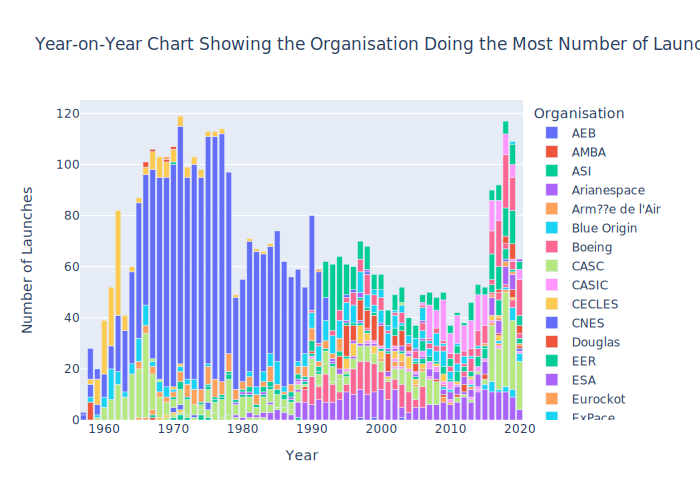

In [454]:
bar = px.bar(org_yearly,
    x='Date', 
    y='Mission_Status',
    color='Organisation',
    title='Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches')
    
bar.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
bar.show('svg')